Labo 4 ISD - XX et Valentin Kaelin

# 1. Wine database

In [6]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd

### 1) 
Créez un notebook pour lire la base de données et générez un dataframe

In [20]:
filename = 'wine.data'
colnames=[
    'Class',
    'Alcohol',
    'Malic acid',
    'Ash',
    'Alcalinity of ash',
    'Magnesium',
    'Total phenols',
    'Flavanoids',
    'Nonflavanoid phenols',
    'Proanthocyanins',
    'Color intensity',
    'Hue',
    'OD280/OD315 of diluted wines',
    'Proline',
] 

df = pd.read_csv(filename, delimiter = ',', names=colnames, header=None)

# On met la colonne "Class" en dernière position du dataframe
df = df[colnames[1:] + ['Class']]

df.describe()

,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline,Class
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,1.938202
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,0.775035
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,1.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,1.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,2.000000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,3.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,3.000000


### 2) 
Se familiariser avec la base de données (p.ex., nombre d’observations, des classes, d’attributs, statistiques des attributs, données manquantes).

In [54]:
df.dropna().count()

Alcohol                         178
Malic acid                      178
Ash                             178
Alcalinity of ash               178
Magnesium                       178
Total phenols                   178
Flavanoids                      178
Nonflavanoid phenols            178
Proanthocyanins                 178
Color intensity                 178
Hue                             178
OD280/OD315 of diluted wines    178
Proline                         178
Class                           178
dtype: int64

On observe donc qu'il n'y a aucune donnée manquante comme les auteurs le précisaient dans le fichier ``wine.names``.

In [38]:
df.groupby('Class')['Class'].count()

Class
1    59
2    71
3    48
Name: Class, dtype: int64

In [46]:
print(df.columns)
print(len(df.columns))

Index(['Alcohol', 'Malic acid', 'Ash', 'Alcalinity of ash', 'Magnesium',
       'Total phenols', 'Flavanoids', 'Nonflavanoid phenols',
       'Proanthocyanins', 'Color intensity', 'Hue',
       'OD280/OD315 of diluted wines', 'Proline', 'Class'],
      dtype='object')
14


### 3) 
Réaliser une analyse exploratoire de la base de données en utilisant des box plots et des scatter plots. Analysez s’il y a des variables avec très peu de variabilité et cherchez à identifier des variables qui ont des valeurs différentes pour les différentes classes.

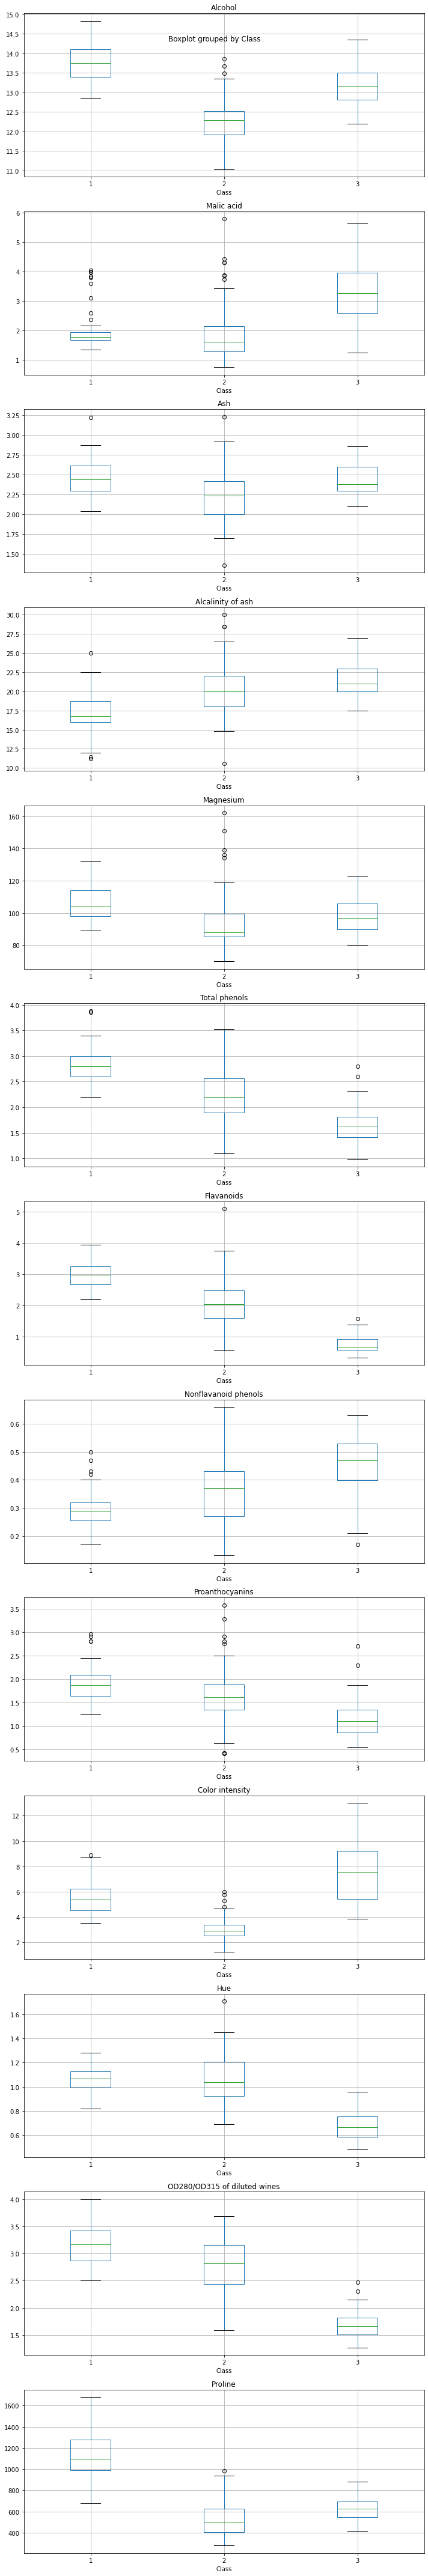

In [92]:
columns_to_show = df.columns[:-1]


fig, ax = plt.subplots(len(columns_to_show), figsize=(10, 60))
plt.suptitle('')

for i in range(len(columns_to_show)):
    df.boxplot(column=[columns_to_show[i]], by='Class', ax=ax[i])
    
plt.tight_layout()  

# TODO: que faire des scatter plots ?? 2 propriétés entre-elles ?

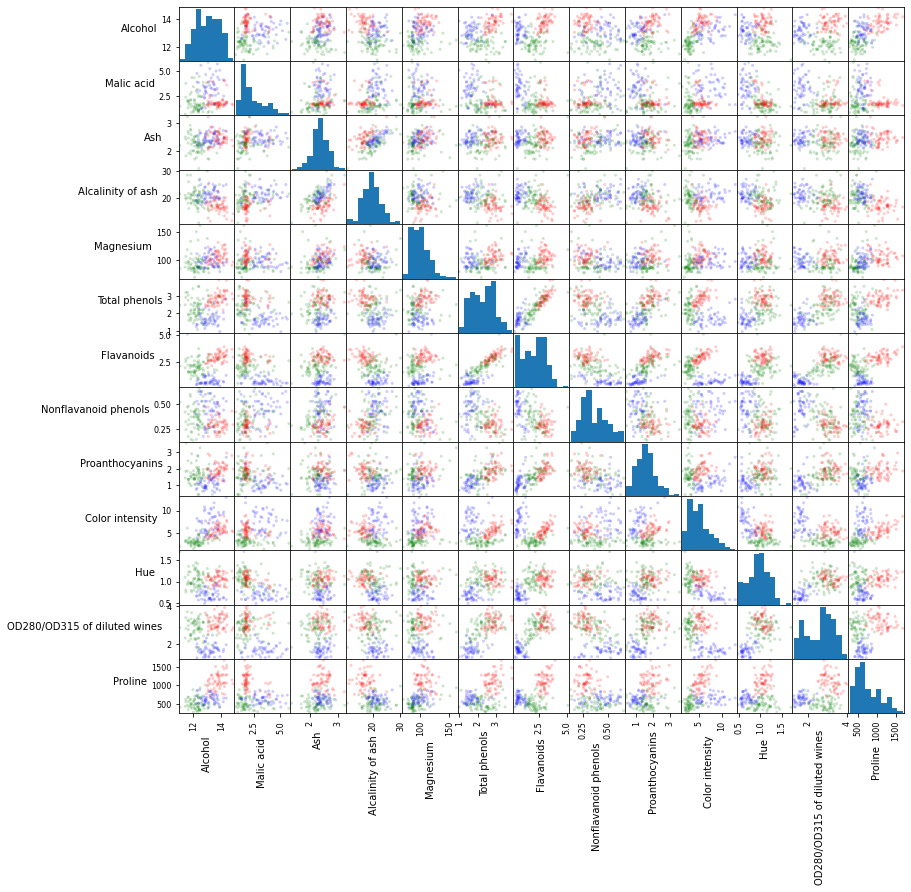

In [100]:
without_class = df.drop('Class', 1)
colors=np.array(59*['r']+71*['g']+48*['b'])
axes = pd.plotting.scatter_matrix(without_class, alpha=0.2, figsize=(13,13), color=colors)

for ax in axes.flatten():
    ax.xaxis.label.set_rotation(90)
    ax.yaxis.label.set_rotation(0)
    ax.yaxis.label.set_ha('right')

* Variables avec très peu de variabilité:

* Variables qui ont des valeurs différentes pour les différentes classes: Flavanoids

# 2. Modèle à base de règles

Utilisez les box-plots des variables qui ont une majorité de valeurs différentes pour les différentes classes afin de programmer des règles (if-then-else) permettant la classification de chaque observation.   
**a)** Essayez au moins trois variables de manière individuelle et   
**b)** deux classificateurs à multiples variables (p.ex., deux ou trois) et évaluez le nombre d’observations qui sont correctement classées (accuracy) par ses modèles.

# 3. L’algorithme des k plus proches voisins (k-NN)

Adaptez le code de k-NN vu en classe pour traiter le problème de classification des vins et testez la performance (accuracy) des modèles pour K=1,2,3,5,7,10. 

Utilisez la méthode de validation hold-out (calculez la moyenne de performances en répétant le « split » 10 fois) et la validation croisée avec n_folds=5. 

Présentez un résumé de vos résultats (c.a.d., un tableau avec les résultats ainsi qu’un plot ou bar chart) et commentez ceux-ci.

In [10]:
import math 
from random import randrange

# Distance euclidienne
def euclidean_distance(row1, row2):
    distance = 0.0
    for i in range(len(row1)-1):
        distance += (row1[i] - row2[i])**2
    return sqrt(distance)

# Localisation des voisins
def get_neighbors(train, test_row, num_neighbors):
    distances = list()
    for train_row in train:
        dist = euclidean_distance(test_row, train_row)
        distances.append((train_row, dist))
    distances.sort(key=lambda tup: tup[1])
    neighbors = list()
    for i in range(num_neighbors):
        neighbors.append(distance[i][0])
    return neighbors

# Calcul des prédictions
def predict_classification(train, test_row, num_neighbors):
    neighbors = get_neighbors(train, test_row, num_neighbors)
    output_values = [row[-1] for i in neighbors]
    prediction = max(set(output_values), key=output_values.count)
    return prediction

# Calcul de précision
def accuracy_metric(actual, predicted):
    correct = 0
    for i in range(len(actual)):
        if actual[i] == predicted[i]:
            correct += 1
    return correct / float(len(actual)) * 100.0

# Préparation des données pour évaluation
def train_test_split(dataset, split=0.60):
    train = list()
    train_size = split * len(dataset)
    dataset_copy = list(dataset)
    while len(train) < train_size:
        index = randrange(len(dataset_copy))
        train.append(dataset_copy.pop(index))
    return train, dataset_copy

# 5. L’algorithme LVQ

Utilisez l’algorithme LVQ pour traiter le problème de classification des vins et testez la performance (accuracy) des modèles et calculez la matrice de confusion du meilleur modèle trouvé en explorant différentes valeurs de hyper-paramètres (c.a.d., nombre de prototypes, learning rate et nombre d’epochs), sur l’ensemble de validation pour chaque « fold » de la validation croisée.

Commentez vos résultats et comparez l’accuracy de ce modèle avec celle obtenu avec k-NN. 

In [7]:
from math import sqrt
from random import randrange
from random import seed
from random import shuffle

# calculate the Euclidean distance between two vectors
def euclidean_distance(row1, row2):
  distance = 0.0
  for i in range(len(row1)-1):
    distance += (row1[i] - row2[i])**2
  return sqrt(distance)

# Locate the best matching unit
def get_best_matching_unit(codebook, test_row):
  distances = list()
  for codevector in codebook:
    dist = euclidean_distance(codevector, test_row)
    distances.append((codevector, dist))
  distances.sort(key=lambda tup: tup[1])
  return distances[0][0]

# Create a random codebook vector
def init_codevector(train,category):
  n_records = len(train)
  n_features = len(train[0])-1
  found = False 
  while(not found):
    random_observation = randrange(n_records)
    if (train[random_observation][-1] == category):
      found = True
  codevector = [train[random_observation][i] for i in range(n_features)]
  codevector.append(category)
  return codevector

# Train a set of codebook vectors
def train_codebook(train, n_codevectors, lrate, epochs):
  codebook = [init_codevector(train,i) for i in range(n_codevectors)]
  print(codebook)
  for epoch in range(epochs):
    lrate = lrate * (1.0-(epoch/float(epochs)))
    sum_error = 0.0
    shuffle(train)
    for row in train:
      bmu = get_best_matching_unit(codebook, row)
      for i in range(len(row)-1):
        error = row[i] - bmu[i]
        sum_error += error**2
        if bmu[-1] == row[-1]:
          bmu[i] += lrate * error
        else:
          bmu[i] -= lrate * error
    print('>epoch=%d, lrate=%.3f, error=%.3f' % (epoch, lrate, sum_error))
  return codebook

# Test the training function
#seed(1)
dataset = [[2.7810836,2.550537003,0],
  [1.465489372,2.362125076,0],
  [3.396561688,4.400293529,0],
  [1.38807019,1.850220317,0],
  [3.06407232,3.005305973,0],
  [7.627531214,2.759262235,1],
  [5.332441248,2.088626775,1],
  [6.922596716,1.77106367,1],
  [8.675418651,-0.242068655,1],
  [7.673756466,3.508563011,1]]
learn_rate = 0.3
n_epochs = 25
n_codevectors = 2
codebooks = train_codebook(dataset, n_codevectors, learn_rate, n_epochs)
print('Codebook: %s' % codebook)

[[1.465489372, 2.362125076, 0], [5.332441248, 2.088626775, 1]]
>epoch=0, lrate=0.300, error=39.782
>epoch=1, lrate=0.288, error=29.416
>epoch=2, lrate=0.265, error=27.891
>epoch=3, lrate=0.233, error=26.956
>epoch=4, lrate=0.196, error=25.011
>epoch=5, lrate=0.157, error=24.728
>epoch=6, lrate=0.119, error=23.779
>epoch=7, lrate=0.086, error=23.132
>epoch=8, lrate=0.058, error=22.545
>epoch=9, lrate=0.037, error=22.095
>epoch=10, lrate=0.022, error=21.780
>epoch=11, lrate=0.013, error=21.572
>epoch=12, lrate=0.007, error=21.443
>epoch=13, lrate=0.003, error=21.371
>epoch=14, lrate=0.001, error=21.334
>epoch=15, lrate=0.001, error=21.316
>epoch=16, lrate=0.000, error=21.309
>epoch=17, lrate=0.000, error=21.306
>epoch=18, lrate=0.000, error=21.305
>epoch=19, lrate=0.000, error=21.305
>epoch=20, lrate=0.000, error=21.305
>epoch=21, lrate=0.000, error=21.305
>epoch=22, lrate=0.000, error=21.305
>epoch=23, lrate=0.000, error=21.305
>epoch=24, lrate=0.000, error=21.305
Codebook: [[2.45486931

Text(0, 0.5, 'x2')

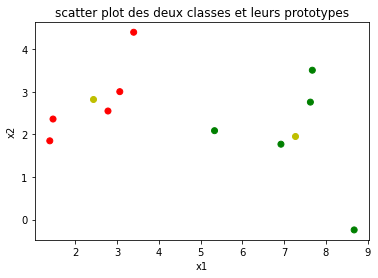

In [8]:
from matplotlib import pyplot as plt
%matplotlib inline
colors = ['r','g','b']
plt.scatter([i[0] for i in codebooks],[j[1] for j in codebooks],c='y')
plt.scatter([i[0] for i in dataset],[j[1] for j in dataset],c=[colors[k[2]] for k in dataset])
plt.title("scatter plot des deux classes et leurs prototypes")
plt.xlabel("x1")
plt.ylabel("x2")